#                                  Exploratory data analysis (EDA)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-necessary-packages" data-toc-modified-id="Import-necessary-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import necessary packages</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Target-variable" data-toc-modified-id="Target-variable-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Target variable</a></span></li><li><span><a href="#EDA-of-catergorical-data" data-toc-modified-id="EDA-of-catergorical-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA of catergorical data</a></span><ul class="toc-item"><li><span><a href="#Association-between-gender-and-TenYearCHD" data-toc-modified-id="Association-between-gender-and-TenYearCHD-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Association between gender and TenYearCHD</a></span></li><li><span><a href="#Association-between-education-and-TenYearCHD" data-toc-modified-id="Association-between-education-and-TenYearCHD-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Association between education and TenYearCHD</a></span></li><li><span><a href="#Association-between-current-smoking-habit-and-TenYearCHD" data-toc-modified-id="Association-between-current-smoking-habit-and-TenYearCHD-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Association between current smoking habit and TenYearCHD</a></span></li><li><span><a href="#Association-between-blood-pressure-medication-and-TenYearCHD" data-toc-modified-id="Association-between-blood-pressure-medication-and-TenYearCHD-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Association between blood pressure medication and TenYearCHD</a></span></li><li><span><a href="#Association-between-stroke-and-TenYearCHD" data-toc-modified-id="Association-between-stroke-and-TenYearCHD-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Association between stroke and TenYearCHD</a></span></li><li><span><a href="#Association-between-Hypertension-and-TenYearCHD" data-toc-modified-id="Association-between-Hypertension-and-TenYearCHD-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Association between Hypertension and TenYearCHD</a></span></li><li><span><a href="#Association-between-diabetes-and-TenYearCHD" data-toc-modified-id="Association-between-diabetes-and-TenYearCHD-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Association between diabetes and TenYearCHD</a></span></li></ul></li><li><span><a href="#EDA-of-numeric-data" data-toc-modified-id="EDA-of-numeric-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA of numeric data</a></span></li><li><span><a href="#Correlation-among-variables" data-toc-modified-id="Correlation-among-variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation among variables</a></span></li><li><span><a href="#Save-data" data-toc-modified-id="Save-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save data</a></span></li></ul></div>

## Import necessary packages

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import pointbiserialr
import math
#to ensure clean outputs ignore the warning messages 
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
#import the data
df = pd.read_csv('../processed_data/01_FE_CHD_data.csv')

In [3]:
# Check first few entries
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#summary of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3658.0,0.443685,0.496886,0.00,0.00,0.00,1.0000,1.0
age,3658.0,49.551941,8.562029,32.00,42.00,49.00,56.0000,70.0
education,3658.0,1.980317,1.022656,1.00,1.00,2.00,3.0000,4.0
currentSmoker,3658.0,0.489065,0.499949,0.00,0.00,0.00,1.0000,1.0
cigsPerDay,3658.0,9.025424,11.921590,0.00,0.00,0.00,20.0000,70.0
BPMeds,3658.0,0.030344,0.171557,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3658.0,0.005741,0.075561,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3658.0,0.311646,0.463229,0.00,0.00,0.00,1.0000,1.0
diabetes,3658.0,0.027064,0.162292,0.00,0.00,0.00,0.0000,1.0
totChol,3658.0,236.847731,44.097681,113.00,206.00,234.00,263.0000,600.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 457.4 KB


## Target variable

Our target variable is 'TenYearCHD'. First let's look at the frequency distribution of the target variable

In [6]:
#Count the number and compute the % of people with or without heart disease in the dataset
target = pd.concat([df['TenYearCHD'].value_counts(), 100 * df['TenYearCHD'].value_counts()/df['TenYearCHD'].value_counts().sum()], axis=1)
target = pd.DataFrame(data=target)
target.columns=['count', '%']
target.index = ['No CHD', 'CHD']
target.head()

,count,%
No CHD,3101,84.7731
CHD,557,15.2269


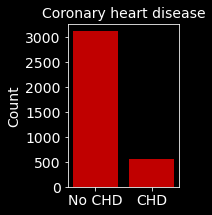

In [38]:
#bar plot of the target variable
x=target.index
y=target['count'].tolist()
plt.figure(figsize=(2,3))
plt.style.use("dark_background")
plt.bar(x,y, color='#C00000')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Coronary heart disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show();

We can clearly see the class imbalance in the target variable. There are 3101 cases that have no CHD while the number of cases with CHD is 557

## EDA of catergorical data


Based on the histogram and summary statistics, gender, education, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes are categorical data.

In [8]:
#list of categorical data
cat = ['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [9]:
#counts unique values of each categorical features
for feat in cat:
    print(feat,':')
    print(df[feat].value_counts())
    print("===================================")

gender :
0    2035
1    1623
Name: gender, dtype: int64
education :
1.0    1526
2.0    1101
3.0     608
4.0     423
Name: education, dtype: int64
currentSmoker :
0    1869
1    1789
Name: currentSmoker, dtype: int64
BPMeds :
0.0    3547
1.0     111
Name: BPMeds, dtype: int64
prevalentStroke :
0    3637
1      21
Name: prevalentStroke, dtype: int64
prevalentHyp :
0    2518
1    1140
Name: prevalentHyp, dtype: int64
diabetes :
0    3559
1      99
Name: diabetes, dtype: int64


In the next step, I will visulize and test association between various categorical features and our taret feature TenYearCHD. I will visulaize the data as bar graph and test the association using Chi-square test of indepenece.

In [10]:
#function to prepare crosstab of selected features and perform chisqure test
def chi2(var1, var2, dataframe):
    """
    Prepare crosstab of selected columns and perform chisquare test
    """
    ctab = pd.crosstab(dataframe[var1], dataframe[var2])
    chi_val, p_val, dof, exp = chi2_contingency(ctab)
    percent_ctab = 100*ctab/ctab.sum()
    return percent_ctab, chi_val, p_val

###  Association between gender and TenYearCHD

gender         Female       Male
TenYearCHD                      
No CHD      87.714988  81.084412
CHD         12.285012  18.915588


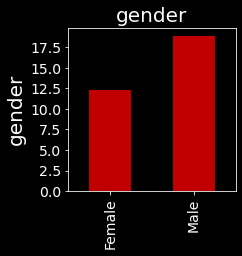

In [11]:
#Association between gender and CHD
df1, chisq, pval = chi2('TenYearCHD', 'gender', df)

gender = df1.rename(columns={0: 'Female', 1: 'Male'}, index={0: 'No CHD', 1: 'CHD'})
print(gender)
gender.T.CHD.plot.bar(color = '#C00000', figsize=(3,3))

plt.style.use("dark_background")
plt.ylabel('Percentaage')
plt.title('CHD by gender')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('gender', fontsize=20)
plt.ylabel('gender', fontsize=20)
plt.xlabel('')
plt.show()

In [12]:
#Chi-square test of independence
print("Chisquare value: ", chisq, "P-value: ", pval)

Chisquare value:  30.24039576227628 P-value:  3.816765643320501e-08


Chi-square test showed that there is significant association between gender and CHD. Analysis showed that 12.28% of the sampled female had CHD while this number increased to 18.91% in male. 

### Association between education and TenYearCHD

education   Some high       High  Some college    college
TenYearCHD                                               
No CHD      80.930537  88.101726     87.664474  85.815603
CHD         19.069463  11.898274     12.335526  14.184397


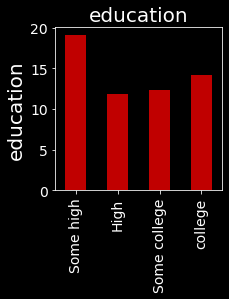

In [13]:
#Association between education and CHD
edu1, chisq, pval = chi2('TenYearCHD', 'education', df)
education = edu1.rename(columns={1: 'Some high', 2: 'High', 3: 'Some college', 4: 'college'}, index={0: 'No CHD', 1: 'CHD'})

print(education)
education.T.CHD.plot.bar(color = '#C00000', figsize=(3,3))
plt.style.use("dark_background")
plt.ylabel('Percentaage')
plt.title('CHD by education')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('education', fontsize=20)
plt.ylabel('education', fontsize=20)
plt.xlabel('')
plt.show()

In [14]:
#Chi-square test of independence
print("Chisquare value: ", chisq, "P-value: ", pval)

Chisquare value:  31.199470511267368 P-value:  7.716846010437319e-07


Chisquare test showed siginificant association between education and CHD. Occurrence of CHD was higher in people with less than high school level education (19%) compared to the people with high school or higher level education (11.89-14.18%). 

### Association between current smoking habit and TenYearCHD

currentSmoker   No smoke      Smoke
TenYearCHD                         
No CHD         85.446763  84.069312
CHD            14.553237  15.930688


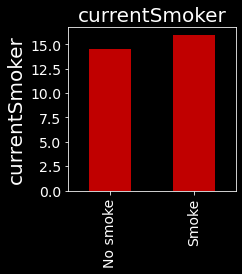

In [15]:
#Association between currentSmoker and CHD
smoke1, chisq, pval = chi2('TenYearCHD', 'currentSmoker', df)
smoke2 = smoke1.rename(columns={0: 'No smoke', 1: 'Smoke'}, index={0: 'No CHD', 1: 'CHD'})
print(smoke2)
smoke2.T.CHD.plot.bar(color = '#C00000', figsize=(3,3))
plt.style.use("dark_background")
plt.ylabel('Percentaage')
plt.title('CHD by smoking habit')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('currentSmoker', fontsize=20)
plt.ylabel('currentSmoker', fontsize=20)
plt.xlabel('')
plt.show()

In [16]:
#Chi-square test of independence
print("Chisquare value: ", chisq, "P-value: ", pval)

Chisquare value:  1.2389725931725915 P-value:  0.2656691520743377


Analysis showed no significant association between current smoking habit and CHD. 14.55% of the sampled population that did not smoke at the time of sampling had CHD and 15.93% of the sampled population that smoked at the time of sampling had CHD.

### Association between blood pressure medication and TenYearCHD

BPMeds            0.0        1.0
TenYearCHD                      
0           85.339724  66.666667
1           14.660276  33.333333


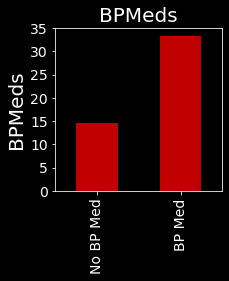

In [17]:
#Association between blood pressure medication and CHD
BPmeds1, chisq, pval = chi2('TenYearCHD', 'BPMeds', df)

BPmeds2 = BPmeds1.rename(columns={0: 'No BP Med', 1: 'BP Med'}, index={0: 'No CHD', 1: 'CHD'})
print(BPmeds1)
BPmeds2.T.CHD.plot.bar(color = '#C00000', figsize=(3,3))
plt.style.use("dark_background")
plt.ylabel('Percentaage')
plt.title('CHD by BP medication')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('BPMeds', fontsize=20)
plt.ylabel('BPMeds', fontsize=20)
plt.xlabel('')
plt.show()

In [18]:
#Chi-square test of independence
print("Chisquare value: ", chisq, "P-value: ", pval)

Chisquare value:  27.645199811623733 P-value:  1.4573326046561633e-07


Chi-square test showed significant association between taking blood pressure medication and CHD. 14.66% of the sampled population who did not take blood pressure medication later had CHD while 33.33% of the sampled population who took blood pressure medication later had CHD. 

### Association between stroke and TenYearCHD

prevalentStroke  No stroke     Stroke
TenYearCHD                           
No CHD           84.905142  61.904762
CHD              15.094858  38.095238


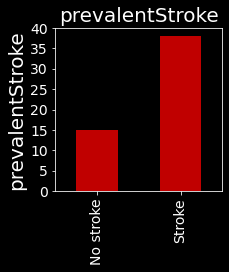

In [19]:
#Association between prevalentStroke and CHD
prevalentStroke1, chisq, pval = chi2('TenYearCHD', 'prevalentStroke', df)

prevalentStroke2 = prevalentStroke1.rename(columns={0: 'No stroke', 1: 'Stroke'}, index={0: 'No CHD', 1: 'CHD'})
print(prevalentStroke2)
prevalentStroke2.T.CHD.plot.bar(color = '#C00000', figsize=(3,3))
plt.style.use("dark_background")
plt.ylabel('Percentaage')
plt.title('CHD by occurrence of stroke')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('prevalentStroke', fontsize=20)
plt.ylabel('prevalentStroke', fontsize=20)
plt.xlabel('')
plt.show()

In [20]:
#Chi-square test of independence
print("Chisquare value: ", chisq, "P-value: ", pval)

Chisquare value:  6.867888343486215 P-value:  0.008775828886339244


Chi-square test showed significant association between occurrence of stroke and CHD. 15.09% of the sampled population who did not have stroke had CHD while 38.09% of the sampled population who had stroke later had CHD. 

### Association between Hypertension and TenYearCHD

prevalentHyp  No hypertension  Hypertension
TenYearCHD                                 
No CHD              89.158062     75.087719
CHD                 10.841938     24.912281


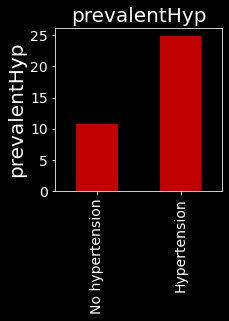

In [21]:
#Association between prevalentHyp and CHD
prevalentHyp1, chisq, pval = chi2('TenYearCHD', 'prevalentHyp', df)

prevalentHyp2 = prevalentHyp1.rename(columns={0: 'No hypertension', 1: 'Hypertension'}, index={0: 'No CHD', 1: 'CHD'})
print(prevalentHyp2)
prevalentHyp2.T.CHD.plot.bar(color = '#C00000', figsize=(3,3))
plt.style.use("dark_background")
plt.ylabel('Percentaage')
plt.title('CHD by hypertension')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('prevalentHyp', fontsize=20)
plt.ylabel('prevalentHyp', fontsize=20)
plt.xlabel('')
plt.show()

In [22]:
#Chi-square test of independence
print("Chisquare value: ", chisq, "P-value: ", pval)

Chisquare value:  119.26537561251291 P-value:  9.161520374818205e-28


Chi-square test showed significant association between hypertension and CHD. Among the sampled population with CHD, 10.84% did not have hypertension while 24.91% had hypertension.

### Association between diabetes and TenYearCHD

diabetes    No diabetes   Diabetes
TenYearCHD                        
No CHD        85.332959  64.646465
CHD           14.667041  35.353535


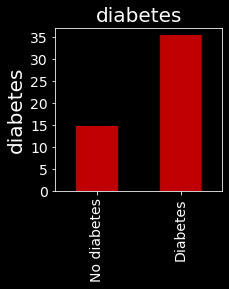

In [23]:
#Association between diabetes and CHD
diabetes1, chisq, pval = chi2('TenYearCHD', 'diabetes', df)

diabetes2 = diabetes1.rename(columns={0: 'No diabetes', 1: 'Diabetes'}, index={0: 'No CHD', 1: 'CHD'})
print(diabetes2)
diabetes2.T.CHD.plot.bar(color = '#C00000', figsize=(3,3))
plt.style.use("dark_background")
plt.ylabel('Percentaage')
plt.title('CHD by diabetes')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('diabetes', fontsize=20)
plt.ylabel('diabetes', fontsize=20)
plt.xlabel('')
plt.show()

In [24]:
#Chi-square test of independence
print("Chisquare value: ", chisq, "P-value: ", pval)

Chisquare value:  30.349358549570468 P-value:  3.608262736322769e-08


There is a signficant association between the occurrence of diabetes and CHD. 14.66% of the sampled population with no diabetes had CHD while 35.35% of the population with diabetes had CHD.

## EDA of numeric data

In [25]:
#list of numberical data
num = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

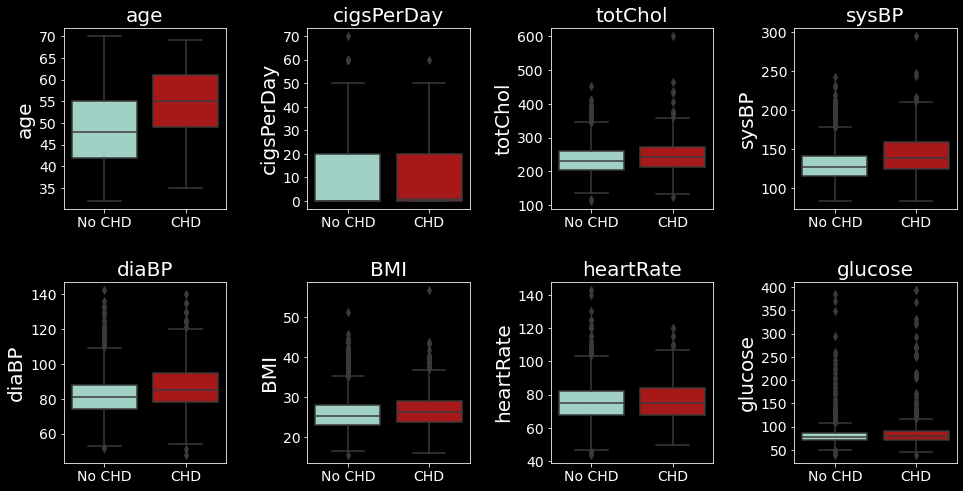

In [26]:
# Box plot showing the comparision of the distribution of various numerical data across samples with or without CHD.
x = 2  # subplot row number
y = 4  # subplot column number
z = 1  # counter

fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
#fig = plt.style.use("dark_background")
fig = plt.grid(b=None)

for i in num:
    fig = plt.style.use("dark_background")
    plt.subplot(x, y, z)
    plt.title(i)
    plt.xlabel(i)
    sns.boxplot(y=i, x='TenYearCHD', data=df, palette=['#99d8c9','#C00000'])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(i, fontsize=20)
    plt.ylabel(i, fontsize=20)
    plt.xlabel('')
    plt.xticks([0,1], ['No CHD', 'CHD'])
    plt.subplots_adjust(hspace=0.4)
    z += 1

plt.show()

In [27]:
#Function to perform t-test
def t_test(D1, D2, alpha):
    """
    function to perform t-test
    """
    stat, p = ttest_ind(D1, D2)
    print('Statistics=%.3f, p=%.3f' % (stat,p))
    if p> alpha:
        print('fail to reject H0')
    else:
        print('reject H0')

In [28]:
#comparision of cigsPerDay between people with or without CHD
t_test(df['age'][df['TenYearCHD']==0], df['age'][df['TenYearCHD']==1] ,0.05)

Statistics=-14.552, p=0.000
reject H0


In [29]:
#comparision of cigsPerDay between people with or without CHD
t_test(df['cigsPerDay'][df['TenYearCHD']==0], df['cigsPerDay'][df['TenYearCHD']==1] ,0.05)

Statistics=-3.149, p=0.002
reject H0


In [30]:
#comparision of totChol between people with or without CHD
t_test(df['totChol'][df['TenYearCHD']==0], df['totChol'][df['TenYearCHD']==1] ,0.05)

Statistics=-5.546, p=0.000
reject H0


In [31]:
#comparision of sysBP between people with or without CHD
t_test(df['sysBP'][df['TenYearCHD']==0], df['sysBP'][df['TenYearCHD']==1] ,0.05)

Statistics=-13.820, p=0.000
reject H0


In [32]:
#comparision of diaBP between people with or without CHD
t_test(df['diaBP'][df['TenYearCHD']==0], df['diaBP'][df['TenYearCHD']==1] ,0.05)

Statistics=-9.181, p=0.000
reject H0


In [33]:
#comparision of BMI between people with or without CHD
t_test(df['BMI'][df['TenYearCHD']==0], df['BMI'][df['TenYearCHD']==1] ,0.05)

Statistics=-4.978, p=0.000
reject H0


In [34]:
#comparision of heartRate between people with or without CHD
t_test(df['heartRate'][df['TenYearCHD']==0], df['heartRate'][df['TenYearCHD']==1] ,0.05)

Statistics=-1.241, p=0.215
fail to reject H0


In [35]:
#comparision of glucose between people with or without CHD
t_test(df['glucose'][df['TenYearCHD']==0], df['glucose'][df['TenYearCHD']==1] ,0.05)

Statistics=-7.432, p=0.000
reject H0


t-test showed that except heart rate, people with CHD had significantly higher mean for 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', and 'glucose' than the people without CHD.

## Correlation among variables

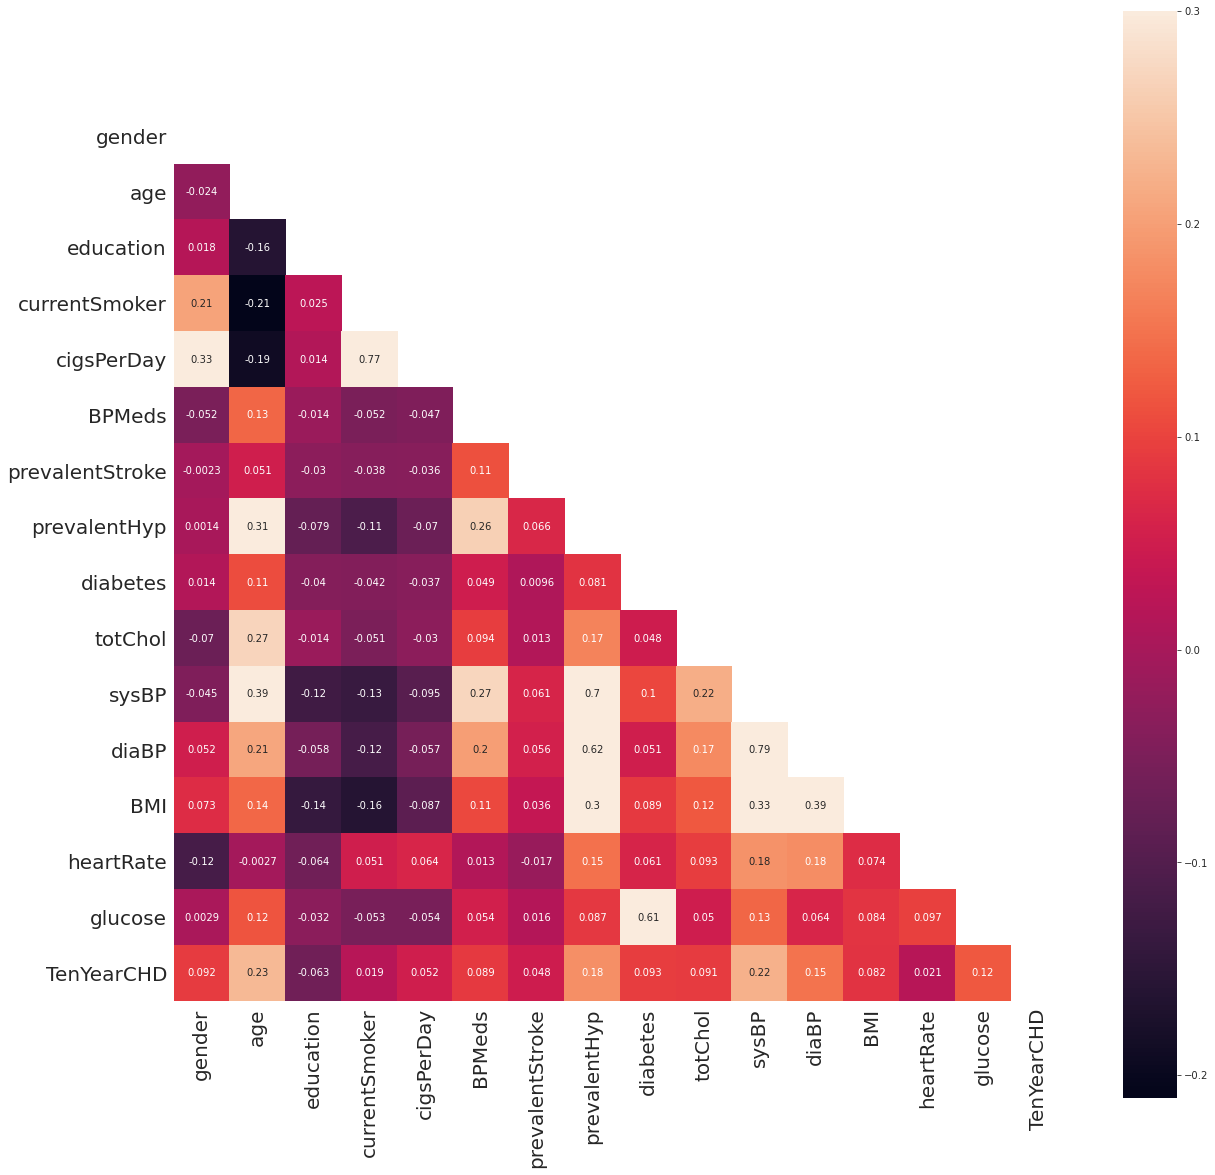

In [36]:
#Show correlation between variable using heatmap
correlation = df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(correlation, annot = True, mask = mask, vmax=.3, square=True)
    #sns.set_theme()
    #sns.heatmap(correlation, annot = True, mask = mask, vmax=.3, square=True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show;

Data do not show a strong correlation of TenYearCHD with any other variables. This may indicate that heart disease is the result of several contributory factors. There are some variables that show moderate to strong correlations. For example, diaBP, sysBP and hypertension show strong correlation among themselves. Similarly, diabetes and glucose also showed moderate correlation. 

## Save data

In [37]:
#save the cleaned data
df.to_csv(r"../processed_data/02_FE_CHD_data.csv",  index = False, header=True)